# Ridge Regression

In [ ]:
# Implement and see the effect of Ridge Regression
# using plots of different Ridge regression lines

# Import Pandas for data processing
import pandas as pd

In [ ]:

# Read the CSV file
dataset = pd.read_csv('ridge.csv')
df = dataset.copy()

In [ ]:
# Split into X (Independent) and Y (predicted)
X = df.iloc[:, :-1]
Y = df.iloc[:,  -1]

In [ ]:
# Import Ridge and matplotlib
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [ ]:
# Create test data for plotting
X_plt = [0,1,2,3,4]

# Create a list of different alpha/penalty parameter values
ridge_l = [0,1,10,100]

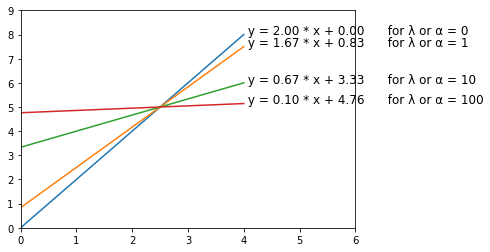

In [ ]:
# Plot different Ridge Regression lines in one figure
for i, l in enumerate(ridge_l):
    ridge = Ridge(alpha=l)
    ridge.fit(X, Y)

    ridge_coeff = ridge.coef_
    ridge_intercept = ridge.intercept_
    Y_plt = ridge.predict(pd.DataFrame(X_plt))

    plt.figure(2)
    plt.plot(X_plt, Y_plt)
    plt.ylim(ymin=0, ymax=9)
    plt.xlim(xmin=0, xmax=6)
    plt.text(X_plt[-1], Y_plt[-1],
             ' y = ' +
             str('%.2f' %ridge_coeff) +
             ' * x' +
             ' + ' +
             str('%.2f' %ridge_intercept) +
             '      for \u03BB or \u03B1 = ' + str(l), fontsize=12)

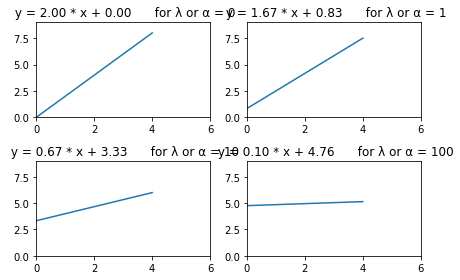

In [ ]:
# Create subplots for Ridge Regression lines in one figure
for i, l in enumerate(ridge_l):
    ridge = Ridge(alpha=l)
    ridge.fit(X, Y)

    ridge_coeff = ridge.coef_
    ridge_intercept = ridge.intercept_
    Y_plt = ridge.predict(pd.DataFrame(X_plt))

    plt.figure(1)
    plt.subplot(2,2,i+1)
    plt.plot(X_plt, Y_plt)
    plt.ylim(ymin=0, ymax=9)
    plt.xlim(xmin=0, xmax=6)
    plt.title(' y = ' +
             str('%.2f' %ridge_coeff) +
             ' * x' +
             ' + ' +
             str('%.2f' %ridge_intercept) +
             '      for \u03BB or \u03B1 = ' + str(l), fontsize=12)
    plt.tight_layout()

In [ ]:
dataset

,X,Y
0,1,2
1,2,4
2,3,6
3,4,8


# Lasso Regression

<ipython-input-12-271f5f40c150>:29: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X, Y)
C:\Users\eljan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


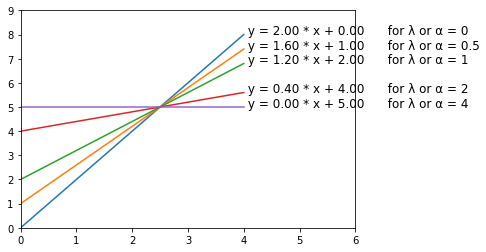

In [ ]:
# Implement and see the effect of Lasso Regression
# using plots of different Lasso regression lines

# Import Pandas for data processing
import pandas as pd

# Read the CSV file
dataset = pd.read_csv('ridge.csv')
df = dataset.copy()

# Split into X (Independent) and Y (predicted)
X = df.iloc[:, :-1]
Y = df.iloc[:,  -1]

# Import Lasso and matplotlib
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

# Create test data for plotting
X_plt = [0,1,2,3,4]


# Create a list of different alpha/penalty parameter values
lasso_l = [0,0.5,1,2,4]

# Plot different Lasso Regression lines in one figure
for i, l in enumerate(lasso_l):
    lasso = Lasso(alpha=l)
    lasso.fit(X, Y)

    lasso_coeff = lasso.coef_
    lasso_intercept = lasso.intercept_
    Y_plt = lasso.predict(pd.DataFrame(X_plt))

    plt.figure(1)
    plt.plot(X_plt, Y_plt)
    plt.ylim(ymin=0, ymax=9)
    plt.xlim(xmin=0, xmax=6)
    plt.text(X_plt[-1], Y_plt[-1],
             ' y = ' +
             str('%.2f' %lasso_coeff) +
             ' * x' +
             ' + ' +
             str('%.2f' %lasso_intercept) +
             '      for \u03BB or \u03B1 = ' + str(l), fontsize=12)

## Voting Classifier

In [ ]:
import pandas as pd
credit = pd.read_csv("CreditCardDefault.csv")
credit.drop(["ID"], axis=1, inplace=True)

In [ ]:
X = credit.iloc[:, 0:23]
y = credit.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, stratify = y)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Voting

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = SVC()

In [ ]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train);

In [ ]:
model1_pred = model1.predict(X_test)
model2_pred = model2.predict(X_test)
model3_pred = model3.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
model1.__class__.__name__

'LogisticRegression'

In [ ]:
print(model1.__class__.__name__ , accuracy_score(y_test, model1_pred))
print(model2.__class__.__name__ , accuracy_score(y_test, model2_pred))
print(model3.__class__.__name__ , accuracy_score(y_test, model3_pred))

LogisticRegression 0.8141111111111111
DecisionTreeClassifier 0.7245555555555555
SVC 0.8221111111111111


### Hard

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
estimators = [('lr', model1), ('dt', model2) , ('svm', model3) ]
voting_hard = VotingClassifier(estimators, voting="hard")

In [ ]:
voting_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',...
                                        

In [ ]:
voting_hard_pred = voting_hard.predict(X_test)

In [ ]:
accuracy_score(y_test, voting_hard_pred)

0.8201111111111111

### Soft

In [ ]:
estimators = [('lr', model1), ('dt', model2) , ('svm', model3) ]
voting_soft = VotingClassifier(estimators, voting="soft")

In [ ]:
voting_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',...
                                        

In [ ]:
voting_soft_pred = voting_soft.predict(X_test)

AttributeError: predict_proba is not available when  probability=False

In [ ]:
model4 = SVC(probability=True)
estimators = [('lr', model1), ('dt', model2) , ('svm', model4) ]
voting_soft = VotingClassifier(estimators, voting="soft")

In [ ]:
voting_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',...
                                        

In [ ]:
voting_soft_pred = voting_soft.predict(X_test)

In [ ]:
accuracy_score(y_test, voting_soft_pred)

0.8118888888888889

## Voting Regressor

In [ ]:
import pandas as pd
data = pd.read_csv("bostonhousing.csv")

In [ ]:
X = data.iloc[:, 1:14]
y = data.iloc[:, -1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

## Apply 3 Different Regression Alogorithm individually

* Linear Regression
* Support vector Regressor
* Decision Tree Regressor

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model1 = LinearRegression()
model2 = SVR()
model3 = DecisionTreeRegressor()

In [ ]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train);

In [ ]:
model1_pred = model1.predict(X_test)
model2_pred = model2.predict(X_test)
model3_pred = model3.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print(r2_score(y_test, model1_pred))
print(r2_score(y_test, model2_pred))
print(r2_score(y_test, model3_pred))

0.7479880990363954
0.31100103312424543
0.7575135366339802


## Apply Voting Regressor

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html

In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
estimators = [('lr', model1), ('svr', model2), ('dt', model3)]
voting_reg = VotingRegressor(estimators)

In [ ]:
voting_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()), ('svr', SVR()),
                            ('dt', DecisionTreeRegressor())])

In [ ]:
voting_reg_pred = voting_reg.predict(X_test)

In [ ]:
print(r2_score(y_test, voting_reg_pred))

0.8187456978266656


:## Apply Weights [0.3, 0.1, 0.6] and Again Apply Voting Regressor

In [ ]:
estimators = [('lr', model1), ('svr', model2), ('dt', model3)]
voting_reg = VotingRegressor(estimators, weights=[0.3, 0.1, 0.6])

In [ ]:
voting_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()), ('svr', SVR()),
                            ('dt', DecisionTreeRegressor())],
                weights=[0.3, 0.1, 0.6])

In [ ]:
voting_reg_pred = voting_reg.predict(X_test)

In [ ]:
print(r2_score(y_test, voting_reg_pred))

0.8397409606275451


## Bagging Classifier

In [ ]:
import pandas as pd
credit = pd.read_csv("CreditCardDefault.csv")
credit.drop(["ID"], axis=1, inplace=True)

In [ ]:
X = credit.iloc[:, 0:23]
y = credit.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, stratify = y)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Bagging

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
help(BaggingClassifier)

Help on class BaggingClassifier in module sklearn.ensemble._bagging:

class BaggingClassifier(sklearn.base.ClassifierMixin, BaseBagging)
 |  BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)
 |  
 |  A Bagging classifier.
 |  
 |  A Bagging classifier is an ensemble meta-estimator that fits base
 |  classifiers each on random subsets of the original dataset and then
 |  aggregate their individual predictions (either by voting or by averaging)
 |  to form a final prediction. Such a meta-estimator can typically be used as
 |  a way to reduce the variance of a black-box estimator (e.g., a decision
 |  tree), by introducing randomization into its construction procedure and
 |  then making an ensemble out of it.
 |  
 |  This algorithm encompasses several works from the literature. When random
 |  subsets of the dataset are drawn as

In [ ]:
from sklearn.svm import SVC
svm = SVC(probability=True)

In [ ]:
bag = BaggingClassifier(base_estimator= svm,
                 n_estimators = 10,
                 max_samples = 0.4,
                 max_features = 12,
                 bootstrap = True,
                 bootstrap_features = True,
                 n_jobs = -1,
                 random_state = 123)

In [ ]:
X_train.shape

(21000, 23)

In [ ]:
21000 * 0.4

8400.0

In [ ]:
23*0.7

16.099999999999998

In [ ]:
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=True, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=True, max_features=12,
                  max_samples=0.4, n_estimators=10, n_jobs=-1, oob_score=False,
                  random_state=123, verbose=0, warm_start=False)

In [ ]:
bag_pred = bag.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, bag_pred)

0.8184444444444444

## Gradient Boosting Classifier

In [ ]:
import pandas as pd
credit = pd.read_csv("CreditCardDefault.csv")
credit.drop(["ID"], axis=1, inplace=True)

In [ ]:
X = credit.iloc[:, 0:23]
y = credit.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, stratify = y)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbm = GradientBoostingClassifier(random_state = 123)

In [ ]:
gbm.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gbm_pred = gbm.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, gbm_pred)

0.8235555555555556

## XGBoost Classifier

In [ ]:
import pandas as pd
credit = pd.read_csv("CreditCardDefault.csv")
credit.drop(["ID"], axis=1, inplace=True)

In [ ]:
X = credit.iloc[:, 0:23]
y = credit.iloc[:, -1]

In [ ]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: next_month_payment, Length: 30000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, stratify = y)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### XGBoost

https://xgboost.readthedocs.io/en/latest/python/index.html

pip install xgboost

In [ ]:
import xgboost
print(xgboost.__version__)

1.3.3


In [ ]:
from xgboost import XGBClassifier

https://xgboost.readthedocs.io/en/latest/parameter.html

In [ ]:
help(XGBClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(*, objective='binary:logistic', use_label_encoder=True, **kwargs)
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : int
 |          Number of boosting rounds.
 |      use_label_encoder : bool
 |          (Deprecated) Use the label encoder from scikit-learn to encode the labels. For new code,
 |          we recommend that you set this parameter to False.
 |  
 |      max_depth : int
 |          Maximum tree depth for base learners.
 |      learning_rate : float
 |          Boosting learning rate (xgb's "eta")
 |      verbosity : int
 |          The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
 |      objective : string or callable
 |          Specify the learning task and the corresponding learning objective or
 |          a custom objective func

In [ ]:
xgbt = XGBClassifier(max_depth = 2,
             learning_rate = 0.2,
             objective  = "multi:softmax",
             num_class = 2,
             booster = "gbtree",
             n_estimarors = 10,
             random_state = 123)

In [ ]:
xgbt.fit(X_train, y_train)

[11:06:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimarors } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:06:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\eljan\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimarors=10, n_estimators=100, n_jobs=8, num_class=2,
              num_parallel_tree=1, objective='multi:softmax', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
xgbt_pred = xgbt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, xgbt_pred)

0.8193333333333334

In [ ]:
xgbt.score(X_train, y_train)

0.8231904761904761

In [ ]:
xgbt.score(X_test, y_test)

0.8193333333333334

# CatBoost

In [ ]:
import pandas as pd
credit = pd.read_csv("CreditCardDefault.csv")
credit.drop(["ID"], axis=1, inplace=True)

In [ ]:
X = credit.iloc[:, 0:23]
y = credit.iloc[:, -1]

In [ ]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: next_month_payment, Length: 30000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, stratify = y)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from catboost import CatBoostRegressor

# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=2,
                          learning_rate=1,
                          depth=2)
# Fit model
model.fit(X_train, y_train)
# Get predictions
preds = model.predict(X_test)

0:	learn: 0.3763297	total: 74.7ms	remaining: 74.7ms
1:	learn: 0.3733111	total: 79.2ms	remaining: 0us


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
model.score(X_train, y_train)

0.1910083825051787

In [ ]:
model.score(X_test, y_test)

0.2076158366851153